In [1]:
import pandas as pd

from pandas                import Series,DataFrame
from collections           import Counter
from sklearn.preprocessing import LabelEncoder

import seaborn           as sns
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

sns.set(style="white", palette="pastel", color_codes=True)

import numpy as np

random_state = 142857

# Data loading

In [2]:
df = pd.read_csv('../data/saleproperties.csv')

In [3]:
df[:2].transpose()

,0,1
id,922105204,993554513
region,rhone_alpes,alsace
regionCode,22,1
departement,ain,haut_rhin
departementCode,1,68
postalCode,1700,68260
city,neyron,kingersheim
title,appartement_2_pieces_40_m2,maison_plain_pied_5_pieces_100_m2_kingersheim
publishDate,2016-02-08,2016-07-15
lastUpdateDate,2016-08-26,2016-07-15


We drop the columns that we will not use for the regression.

In [4]:
toDrop = ['regionCode',
          'departementCode',
          'postalCode',
          'title', #just for now
          'publishDate',
          'lastUpdateDate',
          'minPrice',
          'maxPrice',
          'minSurface',
          'maxSurface',
          'minNbRooms',
          'maxNbRooms'
         ]
df = df.drop(toDrop, axis = 1)

df[:2].transpose()

,0,1
id,922105204,993554513
region,rhone_alpes,alsace
departement,ain,haut_rhin
city,neyron,kingersheim
nbPhotos,4,3
price,95000,257000
surface,40,100
nbRooms,2,5
gasConsumption,NaN,v
electricityConsumption,NaN,v


# Data cleaning

We now remove the outliers.

In [5]:
df = df[df['price']   >= 35000                ]
df = df[df['price']   <= 700000               ]
df = df[df['surface'] >= 10                   ]
df = df[df['surface'] <= 400                  ]
df = df[df['nbRooms'] <= 10                   ]
df = df[df['electricityConsumption'].notnull()]
df = df[df['gasConsumption'].notnull()        ]
df = df[df['region'].notnull()                ]
df = df[df['departement'].notnull()           ]

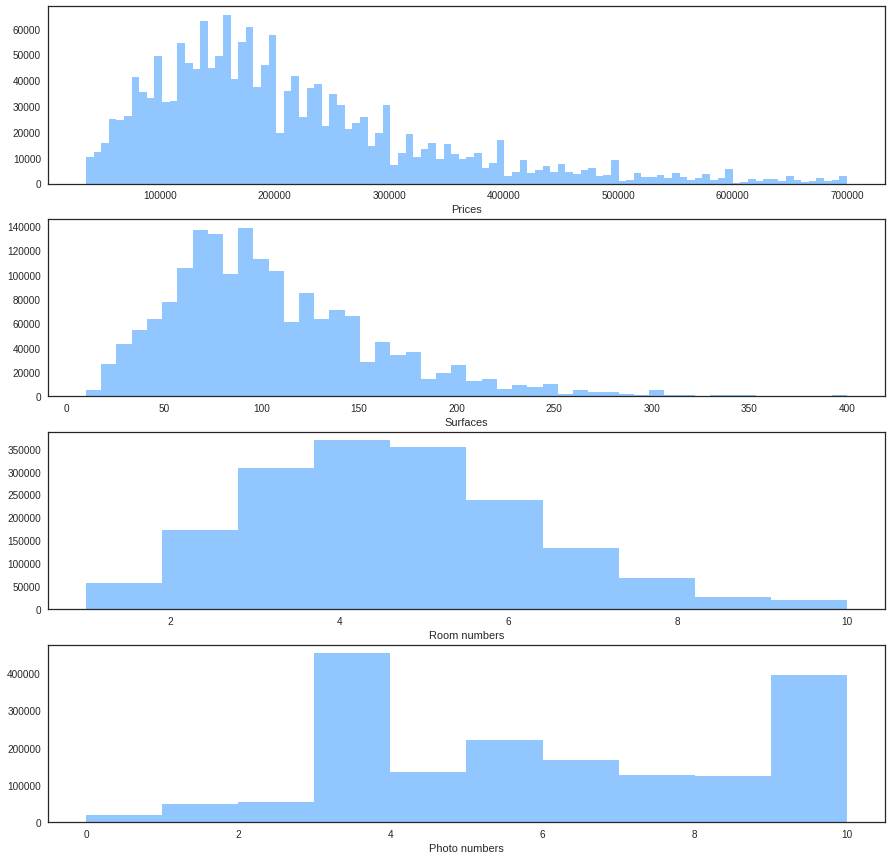

In [6]:
fig, ax = plt.subplots(4, 1, figsize = (15, 15))

ax[0].hist(df['price'], bins = 100)
ax[0].set_xlabel('Prices')

ax[1].hist(df['surface'], bins = 50)
ax[1].set_xlabel('Surfaces')

ax[2].hist(df['nbRooms'], bins = 10)
ax[2].set_xlabel('Room numbers')

ax[3].hist(df['nbPhotos'])
ax[3].set_xlabel('Photo numbers')

# Feature engineering

We encode the departement by a code in order to use it in the regression.

In [7]:
departement_encoder = LabelEncoder()
encoded_departement = departement_encoder.fit_transform(df['departement'])
df['departement']   = encoded_departement

We do the same for the cities.

In [8]:
city_encoder = LabelEncoder()
encoded_city = city_encoder.fit_transform(df['city'])
df['city']   = encoded_city

We know create dummy variable for regions, gas consumption and electricity consumption as there are far less categories.

In [9]:
for column in ['region', 'gasConsumption', 'electricityConsumption']:
    dummies         = pd.get_dummies(df[column])
    dummies.columns = ['%s_%s' % (column, value) for value in dummies.columns]
    df              = df.join(dummies)
    df.drop([column], axis = 1, inplace = True)

In [13]:
df.head().transpose()

,1,2,3,4,5
id,993554513,988541710,993554617,985718891,895496256
departement,33,61,43,87,1
city,11419,23626,17211,1669,25639
nbPhotos,3,2,3,6,3
price,257000,65000,204000,255000,160000
surface,100,56,65,64,140
nbRooms,5,3,3,3,6
region_alsace,1,0,0,0,0
region_aquitaine,0,0,0,0,0
region_auvergne,0,0,0,0,0


# Machine learning

In [14]:
df = df.sample(frac = 0.3)

## Data preparation

In [15]:
from sklearn.cross_validation import train_test_split

/home/greg/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
features = df.drop(['id', 'price'], axis = 1)
target   = df['price']
Xtrain, Xtest, ytrain, ytest = train_test_split(features, target, test_size = 0.1, random_state = random_state)

## Predictions

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
model = RandomForestRegressor(n_estimators=100)
model.fit(Xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [19]:
model.score(Xtest, ytest)

0.73934964928439995

In [20]:
model.score(Xtrain, ytrain)

0.96168535159292279